# Testing the saved Model

In [1]:
from tensorflow import keras

model = keras.models.load_model('asl_model')

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

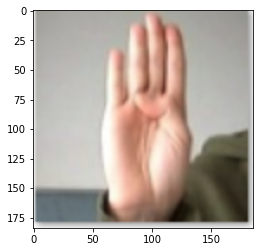

In [4]:
show_image('data/asl_images/b.png')

The images in our dataset were 28x28 pixels and grayscale. We need to make sure to pass the same size and grayscale images into our method for prediction. There are a few ways to edit images with Python, but Keras has a built-in utility that works well. 

In [5]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

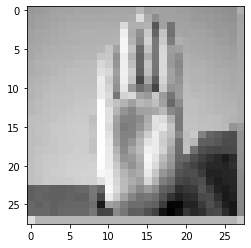

In [6]:
image = load_and_scale_image('data/asl_images/b.png')
plt.imshow(image, cmap='gray')

In [7]:
image = image_utils.img_to_array(image)

In [8]:
# This reshape corresponds to 1 image of 28x28 pixels with one color channel
image = image.reshape(1,28,28,1) 

In [9]:
image = image / 255

In [10]:
prediction = model.predict(image)
print(prediction)

[[3.6929477e-34 1.0000000e+00 2.9042408e-33 7.6666634e-28 1.9964379e-22
  3.3229036e-17 4.9234332e-29 0.0000000e+00 3.4258589e-18 2.5780529e-27
  6.2240338e-31 1.1968773e-34 1.5619806e-35 0.0000000e+00 3.3953204e-35
  0.0000000e+00 8.8079111e-25 1.6487343e-37 0.0000000e+00 4.4681193e-22
  6.6524750e-30 2.7336170e-17 8.4641541e-25 1.3852490e-34]]


In [11]:
import numpy as np
np.argmax(prediction)

1

In [12]:
# Alphabet does not contain j or z because they require movement
alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {}
for i in range(24):
    dictionary[i] = alphabet[i]
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

In [13]:
dictionary[np.argmax(prediction)]

'b'

In [14]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image = image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1)
    # Normalize image
    image = image/255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    # Return prediction
    return predicted_letter   

'b'

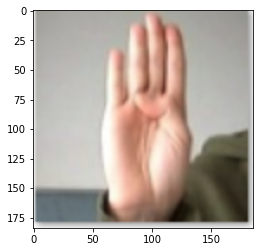

In [15]:
predict_letter("data/asl_images/b.png")

'a'

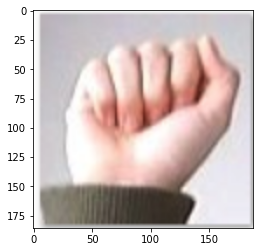

In [16]:
predict_letter("data/asl_images/a.png")

In [17]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}